#### https://techblog-history-younghunjo1.tistory.com/393

# 1. Optimizer Technic
- SGD(Stochastic Gradient Descent)는 Stochastic(확률적) 이라는 단어가 포함된다. 그 이유는 Mini-batch 단위로 전체 데이터 중 일부를 추출해서 그 데이터들을 기반으로 기울기를 구한 후 파라미터를 갱신해주었기 때문이다. 
    - 그래서 일부 데이터가 전체 데이터를 대표한다는 의미에서 Stochastic 이라는 용어가 붙는다.
- 그래서 Back propagation을 통해 얻은 Gradient. 즉, 손실함수 값을 가장 작은 값인 0으로 만들도록하는 파라미터의 변화량을 구했다. SGD와 같은 Optimizer Algorithm의 목적은 이 변화량을 가지고 어떻게 파라미터를 갱신시켜줄 것인지이다.
    - Back propagation의 Gradient는 '지도'의 역할을 하고 SGD와 같은 최적화 알고리즘은 '어떻게 탐험해 나갈지'에 대한 처리이다.

## SGD; Stochastic Gradient Descent

In [2]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
    
    def update(self, params: dict, grads: dict):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

- SGD의 단점은 손실함수가 어떻게 생겼느냐에 따라 비효율적으로 동작할 수 있다.
- 비등방성(anistropy), 기울기가 매번 달라지는 함수에서는 탐색 경로가 비효율적이다.
    - SGD가 지그재그로 탐색하는 원인 중 하나는 기울어진 방향이 찾으려는 최솟값과 다른 방향을 가리키기 때문에, 기울기 값이 음수로 나왔다면 양의 방향으로, 음의 방향으로 이동하려면 기울기 값이 음수로 바뀜에 따라 계속 왔다갔다 수행하면서 지그재그 형태를 이루게 된다.

## Mementum
- momentum은 물리 분야에서 유래한 개념이다. Gradient를 보정하는 최적화 기법으로, v라는 새로운 변수('속도'를 의미한다)를 정의하여 파라미터 갱신의 수식을 정의한다.
- SGD의 지그재그 이동 현상의 정도가 완화된다.

In [3]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params: dict, grads: dict):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = (self.momentum * self.v[key]) - (self.lr * grads[key])
            params[key] += self.v[key]

## AdaGrad
- AdaGrad는 Gradient가 아닌, Learning Rate을 조정하는 방식이다. 학습률 감소(Learning rate Decay)라는 기술을 사용하는데, 학습을 진행하면서 점차 학습률을 줄여나가는 방식을 의미한다
    - 처음에는 큰 학습률로 학습하다가 점차 조금씩 작은 학습률로 학습한다는 의미이다.
    - 여기서 AdaGrad는 모든 파라미터에 대한 학습률을 동시에 낮추는 것이 아니고, '각 파라미터에 맞게 학습률을 줄여나가는 방식'을 채택한다.
- 개별 파라미터에 '적응적으로(Adaptive)' 학습률을 조정한다.

## RMSProp
- AdaGrad의 단점으로는 학습시 진행됨에 따라 기울기 값이 0에 가까워진다는 점이 있고, 0이 될 경우 파라미터는 갱신되지 않는다는 결과를 초래한다.
- RMSProp은 이를 개선한 방법으로, 과거의 먼 기울기일수록, 즉, 학습한지 오래된 기울기 일수록 작은 가중치를 부여하고 최근의 기울기에 큰 가중치를 부여하는 '지수 이동평균'방식을 AdaGrad에 적용한 것 이다. 과거의 기울기 반영 규모를 기하급수적으로 줄일 수 있다.

In [4]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params: dict, grads: dict):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= (self.lr * grads[key]) / (np.sqrt(self.h[key]) + 1e-7)
            
class RMSProp:
    def __init__(self, lr=0.01, rho=0.9):
        self.lr = lr
        self.rho = rho
        self.h = None
        
    def update(self, params: dict, grads: dict):
        if self.h is None:
            self.h = {}
            for key,val in params.items():
                self.h[key] = np.zeros_like(val)
                params[key] -= (self.lr * sgrads[key]) / (np.sqrt(self.h[key]) + 1e-7)

## Adam
- momentum + adagrad = Gradient 보정과 Learning Rate 조정 기술이 들어감
- Adam에는 추가적으로 편향 보정(Bias Correction)이라는 항도 추가 되어 있다.
- http://arxiv.org/abs/1412.6980v8

In [5]:
class Adam:
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            
        self.iter += 1
        lr_t = self.lr * np.sqrt(1.0 - self.beta ** self.iter) / (1.0 - self.beta1 ** self.iter)
        
        for key in params.keys():
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)

# 2. Weights Initial Value
- 신경망 학습의 목적은 가중치의 최적값을 찾는 것인데, 가중치 초깃값을 잘못 설정한다는 것은 시작부터 꼬인다는 의미이다.

## 초깃값을 0으로
- 해당의 아이디어는 오버피팅을 억제하기 위한 가중치 감소(Weight Decay)를 적용함으로써 인위적으로 가중치의 값을 작게 만드는 것에서 출발했다.
- 해당 방식은 Back propagation을 수행할 때 문제가 발생한다.
    - 수행과정에서 파라미터의 변화량을 계산해서 파라미터를 갱신해주어야 하는데, 파라미터가 모두 동일하다면 변화량 또한 동일하게 나올 것 이고, 이는 파라미터 값이 똑같은 값으로 갱신되기 때문이다.
- 이러한 문제 때문에 가중치의 초깃값은 무작위로 설정해주어야 한다.

## 은닉층의 활성화값들 분포 형태를 보고 단서를 파악
- 무작위 방식도 똑똑한 방법들이 있다. (https://techblog-history-younghunjo1.tistory.com/236?category=863123)
- 이들은 모두 은닉층의 활성화값들의 분포 형태를 참고한다.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

def visualize_hidden_outputs(weight_init_std=1, activation='sigmoid'):
    input_data = np.random.randn(1000, 100)
    node_num = 100
    hidden_layer_size = 5
    activations = {}
    
    x = input_data
    
    for i in range(hidden_layer_size):
        if i != 0:
            x = activations[i - 1]
            
        # 가중치 초깃값
        if weight_init_std == 'xaiver':
            w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
        elif weight_init_std == 'he':
            w = np.random.randn(node_num, node_num) / np.sqrt(2 / node_num)
        else:
            w = np.random.randn(node_num, node_num) * weight_init_std
            
        a = np.matmul(x, w)
        
        if activation == 'sigmoid':
            z = sigmoid(a)
        elif activation == 'relu':
            z = relu(a)
        elif activation == 'tanh':
            z = tanh(a)
        else:
            return "지정한 {} 활성화함수는 함수 내에 설정되어 있지 않습니다.".format(activation)
        
        activations[i] = z
    
    for i, a in activations.items():
        plt.subplot(1, len(activations), i + 1)
        plt.title(str(i + 1) + "-layer")
        if i != 0:
            plt.yticks([], [])
        plt.hist(a.flatten(), 30, range=(0, 1))

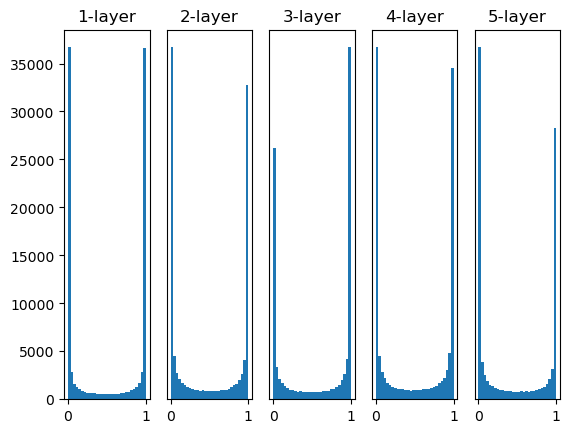

In [8]:
visualize_hidden_outputs(weight_init_std=1, activation="sigmoid")

- 표준편차가 1인 분포를 가질 때, 출력값들은 0과 1로 치우쳐져 있다. Sigmoid 함수 그래프는 0 또는 1에서 미분값이 0이 되어버리는데, 이 상태에서 Back propagation을 수행하다가는 기울기 값이 작아지다가 손실되는 Gradient Vanishing 문제가 발생한다.

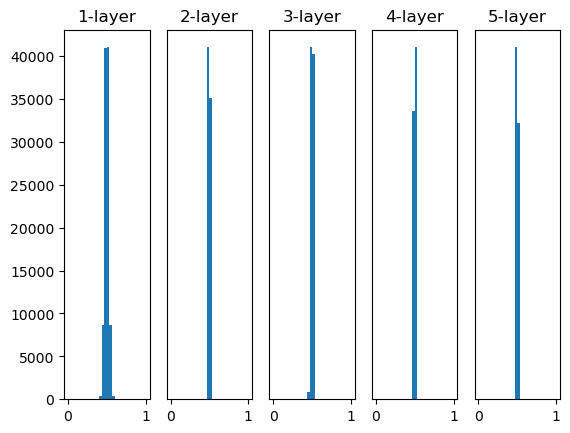

In [9]:
visualize_hidden_outputs(weight_init_std=0.01, activation='sigmoid')

- 0.01과 같이 표준편차가 0에 근사한다는 것은 결국 값의 종류 갯수가 그만큼 매우 적다는 것을 의미하고, 초기화된 가중치 값들이 거의 동일하다는 것을 의미한다.
- 그래프에는 0과 1로 치우쳐져 있지 않아서 Gradient Vanishing 문제가 발생하지는 않는다. 하지만 5개의 신경망이 모두 거의 동일한 값만을 출력하는 것을 볼 수 있다. (표현력 제한 문제)
    - 이와 같은 경우에는 신경망 내부의 노드 갯수를 여러개로 둔 이유가 없다.
    - 100개 노드가 모두 1을 가리키고 있다면, 1개 노드가 1을 가리키고 있는 거랑 다를 것이 없다. 노드가 100개가 되어 오히려 리소스 낭비만 하고 있는 것 이다.
- 그래서 좋은 분포란? 결과값들이 적당히 고루 분포되어 있어야 한다. 그래야 신경망 층 사이에 다양한 값들이 흐름으로써 신경망 학습이 효율적으로 이루어지기 때문이다.

### Xaiver
- 신경망 층 간의 노드 갯수를 고려해 가중치의 표준편차값을 설정한다.

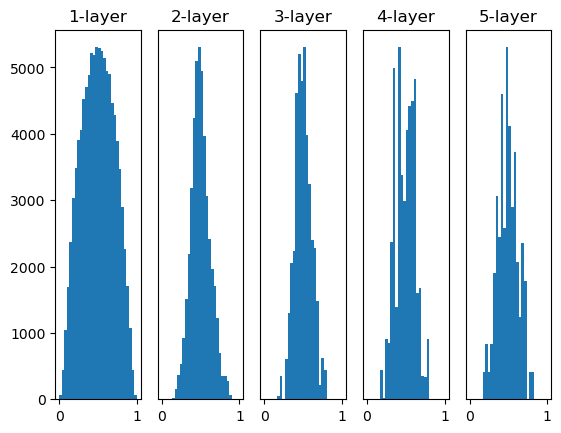

In [10]:
visualize_hidden_outputs(weight_init_std='xaiver', activation='sigmoid')

### He
- Relu 활성함수를 고려한 기법

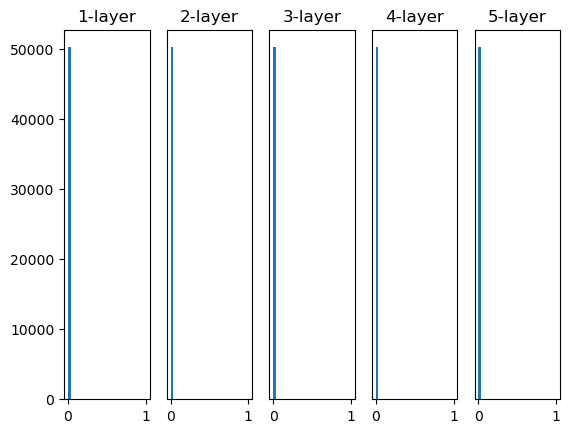

In [12]:
visualize_hidden_outputs(weight_init_std='he', activation='relu')

#### 모든 초기화 기법의 핵심은 앞 계층 노드가 많을수록 가중치의 표준편차 값을 작게하는 것 이다. (대부분의 가중치의 값들이 동일한 값을 나타내도록 분포시킨다.)

# 3. Batch Normalization
- 가중치 초기화를 적절히 설정하는 목적은 은닉층의 출력값들의 분포를 고르게 하기 위함이었다. 그렇다면 은닉층의 출력값들이 나왔을 때, 이 출력값들의 분포를 인위적으로 고르게 분포하도록 강제 변환해주면 어떨까? 이것이 배치 정규화의 아이디어이다.
1. 학습을 빨리 진행시켜 학습 속도를 개선한다.
2. 가중치 초깃값 설정에 의존하지 않는다.
3. 신경망의 오버피팅 문제를 예방할 수 있다.

- 배치 정규화에서 말하는 '배치'는 신경망 학습시 주로 사용하는 미니 배치의 그 '배치'와 동일하다.
- 미니 배치로 들어오는 입력 데이터가 은닉층을 거쳐 나온 출력값들을 정규화 시켜주는 것 이다.
    - 출력값들의 평균이 0, 분산이 1이 되도록 정규화 시켜준다.


# 4. 가중치 감소 (Weight Decay)
- Regularization 이라고 하며, 정규화라고 하는데 Normalization 과 같은 의미는 아니다.
- 가중치 감소는 큰 가중치를 인위적으로 정규화 항을 부여하여 값을 감소시켜 오버피팅을 억제하는 역할을 한다.

# 5. Dropout
- 가중치 감소로는 오버피팅 억제에 한계가 있을 때 사용하는 방법이다. 신경망의 노드를 랜덤하게 삭제하는 방법이다.
- 단, 학습 시에만 노드를 삭제하는 것 이고, 테스트 데이터에 예측할 때는 노드를 삭제하지 않고 모든 노드를 사용하여 예측한다.

In [13]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
    
    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.randn(*x.shape) > dropout_ratio
            return x * self.mask
        
        return x (1 - self.dropout_ratio)
    
    def backward(self, dout):
        return dout * self.mask